In [34]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as graphObjects
from plotly.offline import init_notebook_mode, iplot
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from rake_nltk import Rake

In [35]:
data=pd.read_csv("D:/Projects/Netflix Recommendation/inputs/netflix_titles.csv")  #Get data from the Data set
data.head() #Display Dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [36]:
data.shape  #Get Number of rows and the number of columns in the dataset

(6234, 12)

In [37]:
data.columns  #Get Columns in the dataset

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [38]:
# Get count of the Movies and the Tv Shows
column = "type"
grouped = data[column].value_counts().reset_index()
grouped = grouped.rename(columns = {column : "count", "index" : column})

# Add data for the Circle
circle = graphObjects.Pie(labels=grouped[column], values=grouped['count'], pull=[0.01, 0], marker=dict(colors=["Crimson", "Blue"]))
# Set layout of the circle
layout = graphObjects.Layout(title="Movies and Tv Shows in NetFlix", height=400, legend=dict(x=0.1, y=1.1))
# Display Figure
fig = graphObjects.Figure(data = [circle], layout = layout)
iplot(fig)

In [39]:
tv_data = data[data["type"] == "TV Show"]        #Extract tv data from the dataset
movie_data = data[data["type"] == "Movie"]       #Extract movie data from the dataset

column = "release_year"                          #Get Release Years

view_tv_data = tv_data[column].value_counts()    #Count number of movies in each year
view_tv_data=view_tv_data.reset_index()          #Set index 
view_tv_data = view_tv_data.rename(columns = {column : "count", "index" : column})  #Rename column names of the tv data set(index=Release Year,)


view_tv_data['percent'] = view_tv_data['count'].apply(lambda x : 100*x/sum(view_tv_data['count']))  #Get precentage count of the tv series in each year
view_tv_data = view_tv_data.sort_values(column)    #Sort tv data values according to the release date

view_movie_data = movie_data[column].value_counts().reset_index()   #Reset movie data for view
view_movie_data = view_movie_data.rename(columns = {column : "count", "index" : column})  #Rename column names of the movie data set
view_movie_data['percent'] = view_movie_data['count'].apply(lambda x : 100*x/sum(view_movie_data['count']))  #Get precentage count of the movies in each year
view_movie_data = view_movie_data.sort_values(column)  

tvShows = graphObjects.Bar(x=view_tv_data[column], y=view_tv_data["count"], name="TV Shows", marker=dict(color="red"))  #Add tv shows Data to tv Bar
movies = graphObjects.Bar(x=view_movie_data[column], y=view_movie_data["count"], name="Movies", marker=dict(color="blue"))  #Add movies data to movie bar
figure_data = [tvShows , movies]  #set to Bats to chart
layout = graphObjects.Layout(title="Content Released over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
figure = graphObjects.Figure(figure_data, layout=layout)
figure.show()  #Display Chart

In [40]:
movie=data.query("type=='Movie'")    #extract movie data from the dataset
movie['min']=movie['duration'].str.split(' ',expand=True)[0]   #Add min of the movie column
movie['min']=movie['min'].astype(int)  #Set type of the miniutes column as Int
movie['hours']=movie['min']/60       #Get Number of hours in the movie
movie

C:\Users\User\Anaconda3\envs\yasas_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\Anaconda3\envs\yasas_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\Anaconda3\envs\yasas_env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,min,hours
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,90,1.500000
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,94,1.566667
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,99,1.650000
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",110,1.833333
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,60,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70 min,Documentaries,Frank was a rising pop star when he married Ci...,70,1.166667
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...,102,1.700000
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...,88,1.466667
5580,80064521,Movie,Jeremy Scott: The People's Designer,Vlad Yudin,Jeremy Scott,United States,"April 1, 2016",2015,PG-13,109 min,Documentaries,The journey of fashion designer Jeremy Scott f...,109,1.816667


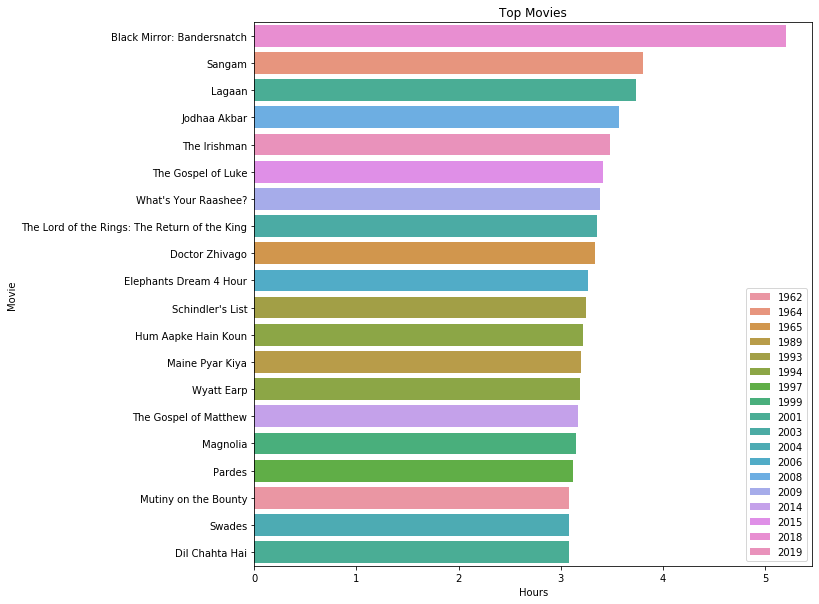

In [41]:
topMovies=movie.sort_values(by='hours',ascending=False).head(20)    #Get top long movies
plt.figure(figsize=(10,10))
sns.barplot(data=topMovies,y='title',x='hours',hue='release_year',dodge=False)  #Set data to the plot (Display Data according to the Released Year)
plt.legend(loc='lower right')  #Dilay identifications
plt.title('Top Movies') 
plt.xlabel('Hours')
plt.ylabel('Movie')
plt.show()   #Display Plot

In [42]:
tvShows=data.query("type=='TV Show'")
tvShows
tvShows['season']=tvShows['duration'].str.split(' ',expand=True)[0]   #Add new column Season 
tvShows['season']=tvShows['season'].astype(int) #Change data type to int
tvShows

C:\Users\User\Anaconda3\envs\yasas_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\Anaconda3\envs\yasas_env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",1
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,1
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,1
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",1
26,80244601,TV Show,Castle of Stars,NaN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6228,80159925,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,2
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",13
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",4
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",2


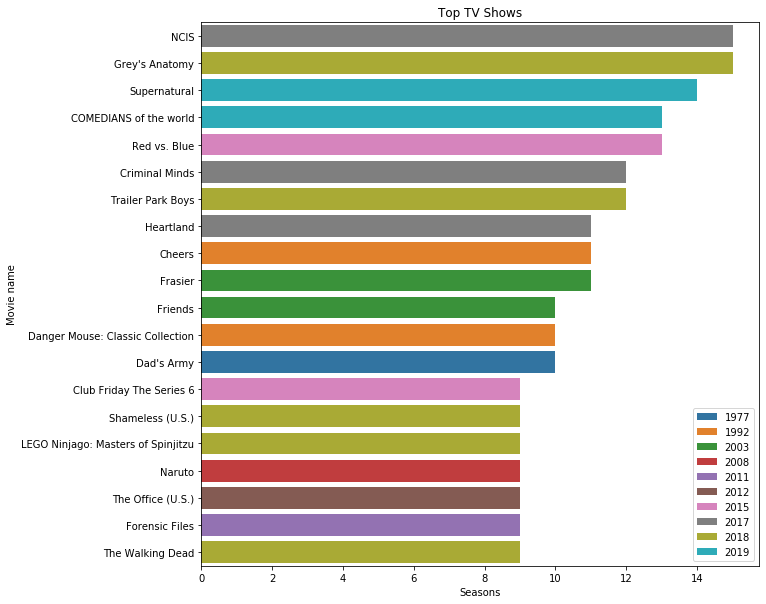

In [43]:
toptvShows=tvShows.sort_values(by='season',ascending=False).head(20)   #GEt 20 tv searies which have most number of seasons
plt.figure(figsize=(10,10))
sns.barplot(data=toptvShows,y='title',x='season',hue='release_year',dodge=False)  #Set data to the plot (Display According to the Released Year)
plt.legend(loc='lower right')
plt.title('Top TV Shows')
plt.xlabel('Seasons')
plt.ylabel('Movie name')
plt.show()  #Display Plot

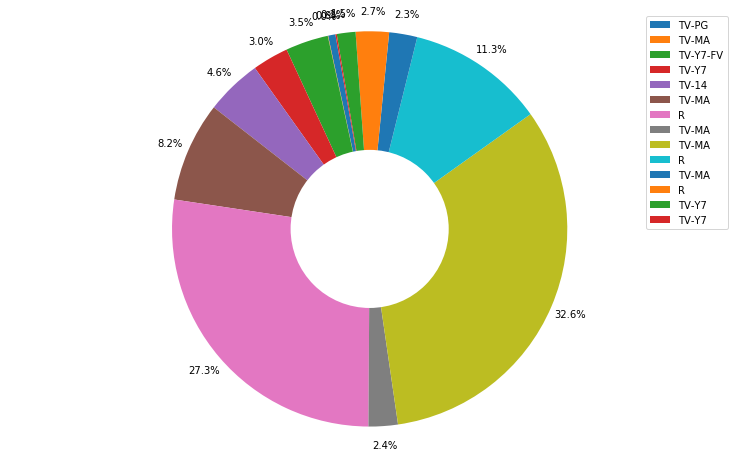

In [44]:
ratings=data.groupby('rating')[['show_id']].count().reset_index()
plt.figure(figsize=(13,8))
plt.pie(ratings['show_id'],autopct='%1.1f%%', startangle=100, pctdistance=1.1,shadow=False)
circle = plt.Circle((0,0),0.4,fc='white')
figure=plt.gcf()
figure.gca().add_artist(circle)
plt.axis('equal')
plt.legend(data['rating'])
plt.show()